In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [12]:
from keras.models import load_model
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input as VGG16_pp_input
from keras.applications.vgg19 import preprocess_input as VGG19_pp_input
from keras.applications.resnet50 import preprocess_input as ResNet50_pp_input
from keras.applications.inception_v3 import preprocess_input as InceptionV3_pp_input
from keras.applications.mobilenet_v2 import preprocess_input as MobileNetV2_pp_input
from tensorflow.keras.applications.efficientnet import preprocess_input as EfficientNetB0_pp_input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
test_data_dir = 'cropped_resized_imgs/test'
img_size = 224

# function to create heatmap
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap='GnBu',
        cbar=True,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F-Score', 3: 'Support'}, inplace=True)
    
    results.sort_values(by='F-Score', ascending=False, inplace=True)                           
    global_acc = accuracy_score(y_true, y_preds)
    
    print("Overall Categorical Accuracy: {:.2f}%".format(global_acc*100))
    return results

Found 1200 images belonging to 5 classes.
0.7175
Overall Categorical Accuracy: 71.75%


,Precision,Recall,F-Score,Support
chenopodium album,0.732143,0.854167,0.788462,240.0
cirsium setosum,0.732601,0.833333,0.779727,240.0
sedge,0.810811,0.625000,0.705882,240.0
corn,0.571823,0.862500,0.687708,240.0
bluegrass,0.990000,0.412500,0.582353,240.0


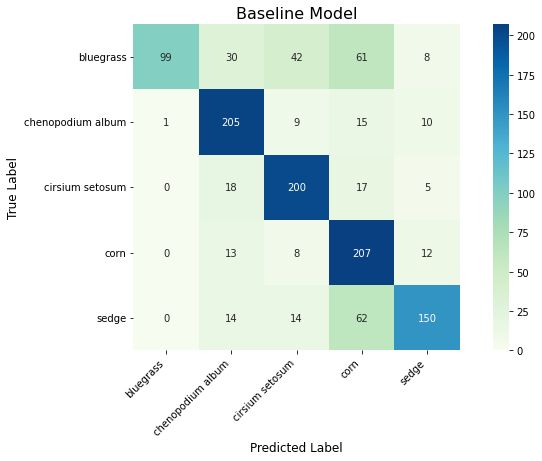

In [14]:
# create test generator for baseline
test_generator = ImageDataGenerator(rescale=1./255)
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(img_size, img_size),
                                             batch_size=1,
                                             class_mode=None,
                                             shuffle=False,
                                             seed=55)

# Get the names of the classes
class_names = testgen.class_indices.keys()

# load model
bestModel = load_model('weights/BaseCNN.hp.weights.hdf5')

# Generate predictions
testgen.reset()
preds = bestModel.predict(testgen)
pred_classes = np.argmax(preds, axis=1)
true_classes = testgen.classes
acc = accuracy_score(true_classes, pred_classes)
print(acc)

# plot confusion matrix
plt.figure(figsize=(12, 6)) # figsize(width, height) in inches, dpi=100
ax = plt.subplot(1, 1, 1) # (rows, cols, index)
plot_heatmap(true_classes, pred_classes, class_names, ax, title="Baseline Model")

# plot results
display_results(true_classes, pred_classes, class_names)

Found 1200 images belonging to 5 classes.
0.9441666666666667
Overall Categorical Accuracy: 94.42%


,Precision,Recall,F-Score,Support
chenopodium album,0.995595,0.941667,0.967880,240.0
cirsium setosum,0.936255,0.979167,0.957230,240.0
sedge,0.950207,0.954167,0.952183,240.0
bluegrass,0.957265,0.933333,0.945148,240.0
corn,0.886640,0.912500,0.899384,240.0


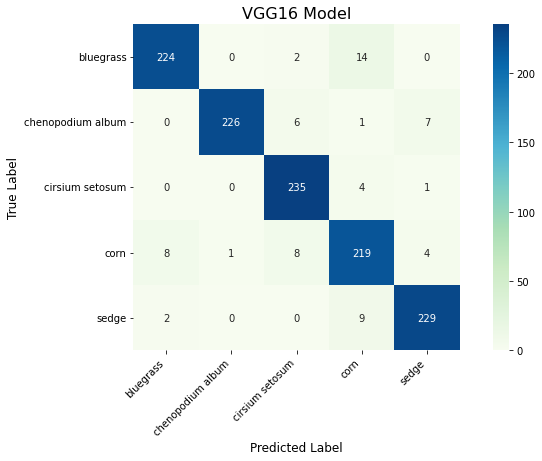

In [15]:
# create test generator for VGG16
test_generator = ImageDataGenerator(preprocessing_function=VGG16_pp_input)
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(img_size, img_size),
                                             batch_size=1,
                                             class_mode=None,
                                             shuffle=False,
                                             seed=55)

# Get the names of the classes
class_names = testgen.class_indices.keys()

# load model
bestModel = load_model('weights/VGG16.hp.weights.hdf5')

# Generate predictions
testgen.reset()
preds = bestModel.predict(testgen)
pred_classes = np.argmax(preds, axis=1)
true_classes = testgen.classes
acc = accuracy_score(true_classes, pred_classes)
print(acc)

# plot confusion matrix
plt.figure(figsize=(12, 6)) # figsize(width, height) in inches, dpi=100
ax = plt.subplot(1, 1, 1) # (rows, cols, index)
plot_heatmap(true_classes, pred_classes, class_names, ax, title="VGG16 Model")

# plot results
display_results(true_classes, pred_classes, class_names)

Found 1200 images belonging to 5 classes.
0.9391666666666667
Overall Categorical Accuracy: 93.92%


,Precision,Recall,F-Score,Support
chenopodium album,0.982456,0.933333,0.957265,240.0
sedge,0.946721,0.962500,0.954545,240.0
bluegrass,0.900000,0.975000,0.936000,240.0
cirsium setosum,0.896154,0.970833,0.932000,240.0
corn,0.985577,0.854167,0.915179,240.0


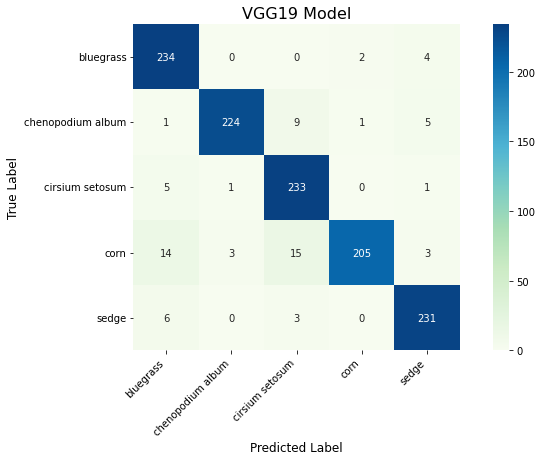

In [16]:
# create test generator for VGG16
test_generator = ImageDataGenerator(preprocessing_function=VGG19_pp_input)
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(img_size, img_size),
                                             batch_size=1,
                                             class_mode=None,
                                             shuffle=False,
                                             seed=55)

# Get the names of the classes
class_names = testgen.class_indices.keys()

# load model
bestModel = load_model('weights/VGG19.hp.weights.hdf5')

# Generate predictions
testgen.reset()
preds = bestModel.predict(testgen)
pred_classes = np.argmax(preds, axis=1)
true_classes = testgen.classes
acc = accuracy_score(true_classes, pred_classes)
print(acc)

# plot confusion matrix
plt.figure(figsize=(12, 6)) # figsize(width, height) in inches, dpi=100
ax = plt.subplot(1, 1, 1) # (rows, cols, index)
plot_heatmap(true_classes, pred_classes, class_names, ax, title="VGG19 Model")

# plot results
display_results(true_classes, pred_classes, class_names)

Found 1200 images belonging to 5 classes.
0.9741666666666666
Overall Categorical Accuracy: 97.42%


,Precision,Recall,F-Score,Support
bluegrass,0.995763,0.979167,0.987395,240.0
chenopodium album,1.000000,0.966667,0.983051,240.0
cirsium setosum,0.967611,0.995833,0.981520,240.0
sedge,0.974576,0.958333,0.966387,240.0
corn,0.935743,0.970833,0.952965,240.0


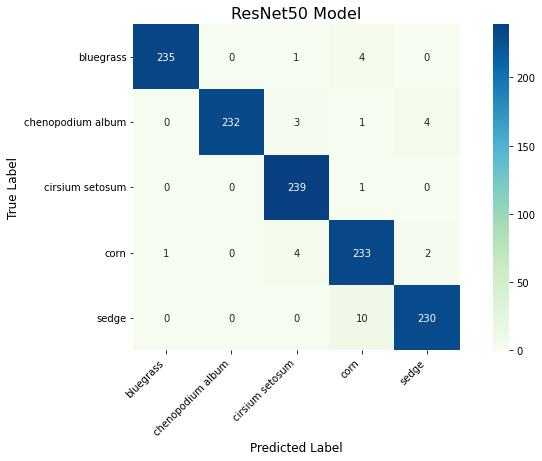

In [17]:
# create test generator for VGG19
test_generator = ImageDataGenerator(preprocessing_function=ResNet50_pp_input)
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(img_size, img_size),
                                             batch_size=1,
                                             class_mode=None,
                                             shuffle=False,
                                             seed=55)

# Get the names of the classes
class_names = testgen.class_indices.keys()

# load model
bestModel = load_model('weights/ResNet50.hp.weights.hdf5')

# Generate predictions
testgen.reset()
preds = bestModel.predict(testgen)
pred_classes = np.argmax(preds, axis=1)
true_classes = testgen.classes
acc = accuracy_score(true_classes, pred_classes)
print(acc)

# plot confusion matrix
plt.figure(figsize=(12, 6)) # figsize(width, height) in inches, dpi=100
ax = plt.subplot(1, 1, 1) # (rows, cols, index)
plot_heatmap(true_classes, pred_classes, class_names, ax, title="ResNet50 Model")

# plot results
display_results(true_classes, pred_classes, class_names)

Found 1200 images belonging to 5 classes.
0.9441666666666667
Overall Categorical Accuracy: 94.42%


,Precision,Recall,F-Score,Support
chenopodium album,0.991489,0.970833,0.981053,240.0
cirsium setosum,0.978723,0.958333,0.968421,240.0
sedge,0.968750,0.904167,0.935345,240.0
corn,0.932489,0.920833,0.926625,240.0
bluegrass,0.862454,0.966667,0.911591,240.0


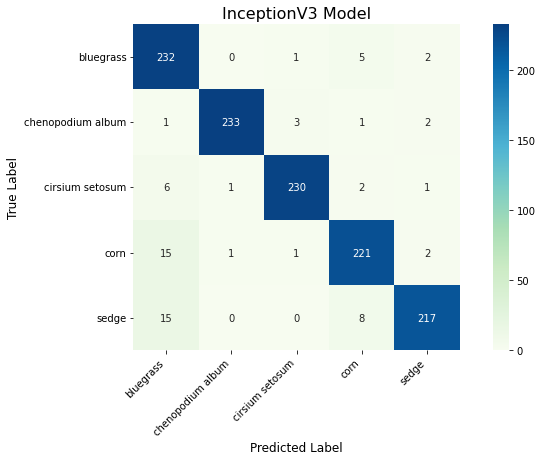

In [18]:
# create test generator for VGG16
test_generator = ImageDataGenerator(preprocessing_function=InceptionV3_pp_input)
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(img_size, img_size),
                                             batch_size=1,
                                             class_mode=None,
                                             shuffle=False,
                                             seed=55)

# Get the names of the classes
class_names = testgen.class_indices.keys()

# load model
bestModel = load_model('weights/InceptionV3.hp.weights.hdf5')

# Generate predictions
testgen.reset()
preds = bestModel.predict(testgen)
pred_classes = np.argmax(preds, axis=1)
true_classes = testgen.classes
acc = accuracy_score(true_classes, pred_classes)
print(acc)

# plot confusion matrix
plt.figure(figsize=(12, 6)) # figsize(width, height) in inches, dpi=100
ax = plt.subplot(1, 1, 1) # (rows, cols, index)
plot_heatmap(true_classes, pred_classes, class_names, ax, title="InceptionV3 Model")

# plot results
display_results(true_classes, pred_classes, class_names)

Found 1200 images belonging to 5 classes.
0.9533333333333334
Overall Categorical Accuracy: 95.33%


,Precision,Recall,F-Score,Support
chenopodium album,1.000000,0.954167,0.976546,240.0
cirsium setosum,0.974576,0.958333,0.966387,240.0
sedge,0.982759,0.950000,0.966102,240.0
corn,0.892720,0.970833,0.930140,240.0
bluegrass,0.925620,0.933333,0.929461,240.0


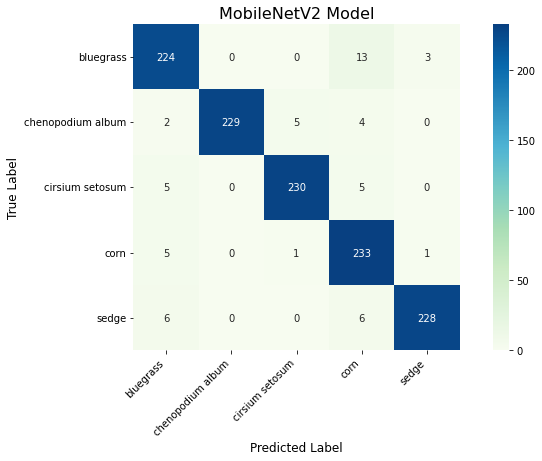

In [21]:
# create test generator for VGG16
test_generator = ImageDataGenerator(preprocessing_function=MobileNetV2_pp_input)
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(img_size, img_size),
                                             batch_size=1,
                                             class_mode=None,
                                             shuffle=False,
                                             seed=55)

# Get the names of the classes
class_names = testgen.class_indices.keys()

# load model
bestModel = load_model('weights/MobileNetV2.hp.weights.hdf5')

# Generate predictions
testgen.reset()
preds = bestModel.predict(testgen)
pred_classes = np.argmax(preds, axis=1)
true_classes = testgen.classes
acc = accuracy_score(true_classes, pred_classes)
print(acc)

# plot confusion matrix
plt.figure(figsize=(12, 6)) # figsize(width, height) in inches, dpi=100
ax = plt.subplot(1, 1, 1) # (rows, cols, index)
plot_heatmap(true_classes, pred_classes, class_names, ax, title="MobileNetV2 Model")

# plot results
display_results(true_classes, pred_classes, class_names)

Found 1200 images belonging to 5 classes.
0.97
Overall Categorical Accuracy: 97.00%


,Precision,Recall,F-Score,Support
bluegrass,0.987395,0.979167,0.983264,240.0
cirsium setosum,0.971311,0.987500,0.979339,240.0
chenopodium album,0.995595,0.941667,0.967880,240.0
sedge,0.958848,0.970833,0.964803,240.0
corn,0.939516,0.970833,0.954918,240.0


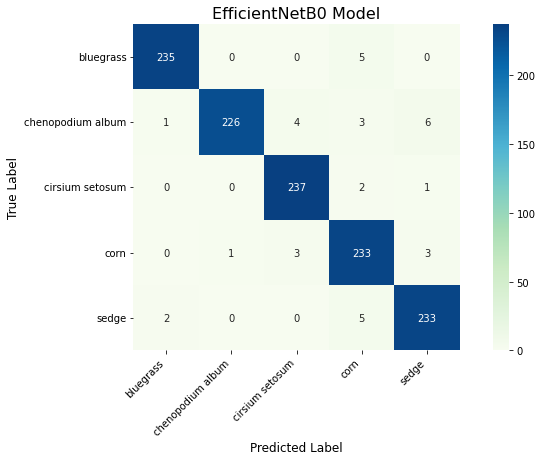

In [20]:
# create test generator for VGG16
test_generator = ImageDataGenerator(preprocessing_function=EfficientNetB0_pp_input)
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(img_size, img_size),
                                             batch_size=1,
                                             class_mode=None,
                                             shuffle=False,
                                             seed=55)

# Get the names of the classes
class_names = testgen.class_indices.keys()

# load model
bestModel = load_model('weights/EfficientNetB0.hp.weights.hdf5')

# Generate predictions
testgen.reset()
preds = bestModel.predict(testgen)
pred_classes = np.argmax(preds, axis=1)
true_classes = testgen.classes
acc = accuracy_score(true_classes, pred_classes)
print(acc)

# plot confusion matrix
plt.figure(figsize=(12, 6)) # figsize(width, height) in inches, dpi=100
ax = plt.subplot(1, 1, 1) # (rows, cols, index)
plot_heatmap(true_classes, pred_classes, class_names, ax, title="EfficientNetB0 Model")

# plot results
display_results(true_classes, pred_classes, class_names)